In [1]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets on CustomerID
customer_transactions = pd.merge(customers, transactions, on='CustomerID')

In [3]:
# Total spending per customer
total_spending = customer_transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spending.rename(columns={'TotalValue': 'TotalSpending'}, inplace=True)

# Number of transactions per customer
num_transactions = customer_transactions.groupby('CustomerID')['TransactionID'].count().reset_index()
num_transactions.rename(columns={'TransactionID': 'NumTransactions'}, inplace=True)

# Average transaction value per customer
avg_transaction_value = customer_transactions.groupby('CustomerID')['TotalValue'].mean().reset_index()
avg_transaction_value.rename(columns={'TotalValue': 'AvgTransactionValue'}, inplace=True)

# Merge features into a single dataset
customer_features = pd.merge(total_spending, num_transactions, on='CustomerID')
customer_features = pd.merge(customer_features, avg_transaction_value, on='CustomerID')

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalSpending', 'NumTransactions', 'AvgTransactionValue']])
scaled_features = pd.DataFrame(scaled_features, columns=['TotalSpending', 'NumTransactions', 'AvgTransactionValue'])

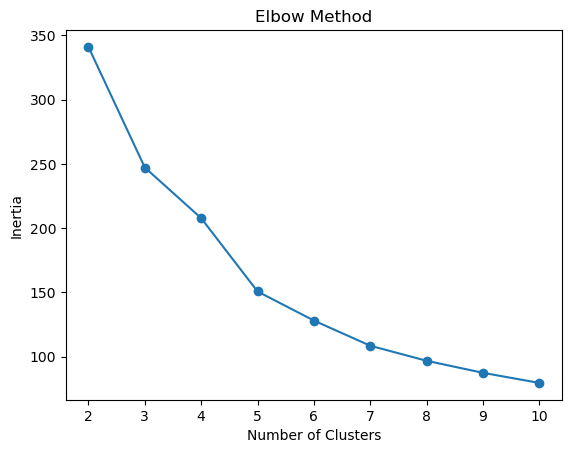

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

In [11]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.0604240399923033


In [13]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, customer_features['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3135106549790539


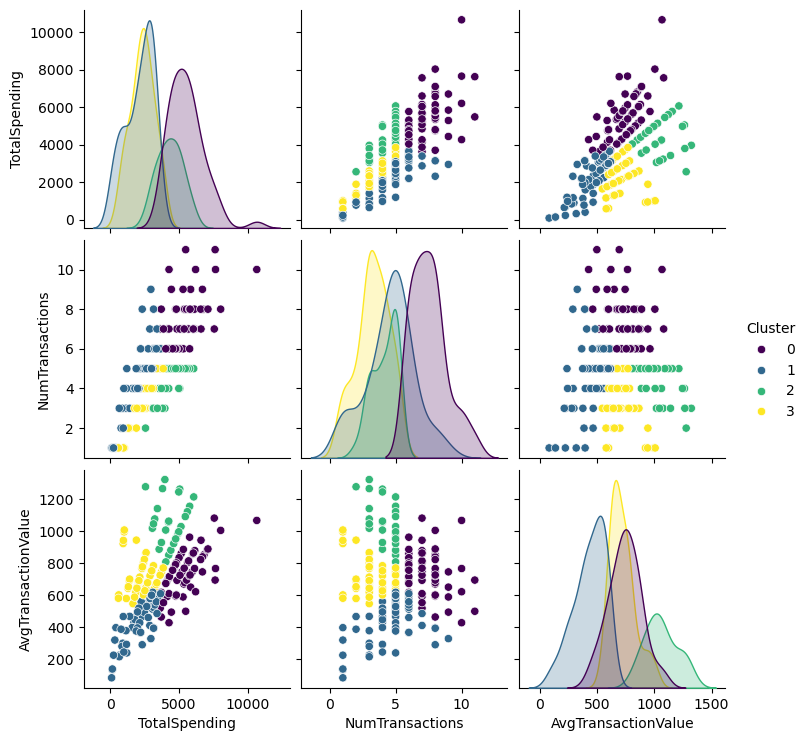

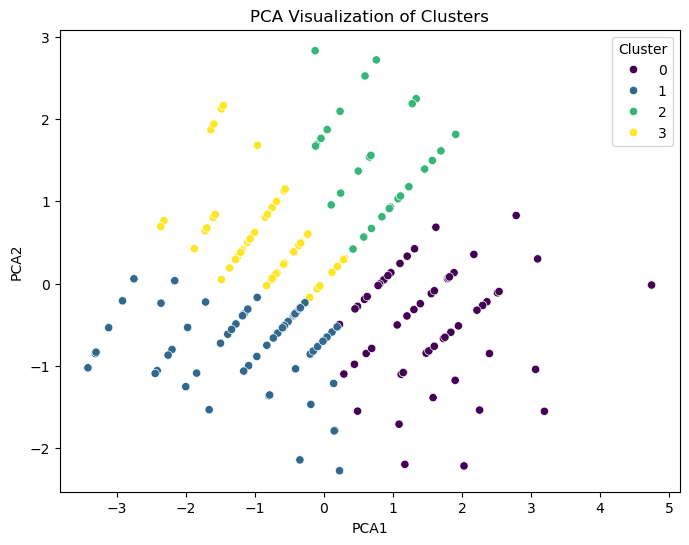

In [15]:
import seaborn as sns

# Pair Plot
sns.pairplot(customer_features, hue='Cluster', palette='viridis')
plt.show()

# PCA for 2D Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
customer_features['PCA1'] = pca_result[:, 0]
customer_features['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='viridis')
plt.title('PCA Visualization of Clusters')
plt.show()